# Análise de Risco das Ações de Construtoras Brasileiras ROSSI, PDG , CYRELA E EZTEC
### Anderson Amaral : Fev/ 2017
#### Python 3.5.1 |Anaconda custom (64-bit)| (default, Dec  7 2015, 11:16:01) 
#### [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]



In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# O pandas_datareader mudou recentemente e precisa ser chamado dessa maneira agora:

import pandas_datareader.data as web

In [4]:
from datetime import datetime

In [5]:
Brazil_list = ['RSID3.SA', 'PDGR3.SA', 'CYRE3.SA', 'EZTC3.SA']

In [6]:
end = datetime.now()

start = datetime(end.year-1, end.month,end.day)

In [7]:
for stock in Brazil_list:
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

### Acima, chamei a lista de 4 construtoras e nomeei como Brazil_list. Todavia, antes vou fazer uma análise individual, no caso da PDG

In [8]:
PDG_list = ['PDGR3.SA']

In [9]:
for stock in PDG_list:
    PDG_list = web.DataReader(stock,'yahoo',start,end)

### Abaixo, temos os últimos cinco dias da PDG no ibovespa há um ano:

In [10]:
PDG_list.head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-02-22,5.92,6.16,5.74,5.97,824000,5.97
2016-02-23,6.01,6.11,5.64,5.82,532300,5.82
2016-02-24,5.78,6.77,5.59,6.77,862900,6.77
2016-02-25,6.73,7.35,6.70,7.15,713000,7.15
2016-02-26,7.21,7.69,7.03,7.25,655100,7.25


### E aqui, temos os últimos cinco dias da PDG no ibovespa até o dia 17 de Fevereiro, quando houve o último pregão antes dessa análise:

In [11]:
PDG_list.tail()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-13,3.25,3.35,3.22,3.29,3007100,3.29
2017-02-14,3.25,3.32,3.20,3.23,1923900,3.23
2017-02-15,3.22,3.45,3.22,3.29,4996000,3.29
2017-02-16,3.35,3.42,3.29,3.33,2985000,3.33
2017-02-17,3.38,3.38,3.28,3.33,1923600,3.33


### Aqui vemos a situação da PDG no fechamento do pregão dos últimos 12 meses

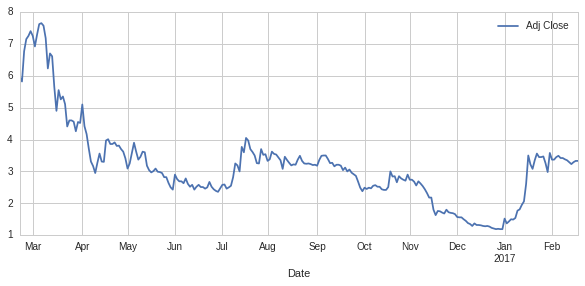

In [12]:
PDG_list['Adj Close'].plot(legend=True,figsize=(10,4))

## Gráfico volume negociado da PDG


###  Como uma empresa problemática e prestes a pedir recuperação judicial, vemos um volume anormal de negociação das ações da empresa no mês de Janeiro. Todos os dias novos boatos como possibilidade de mudanças nas leis de distratos ou ajudas governamentais alteram a situação da PDG. Uma busca no Google explica o salto no gráfico de volume negociado em Janeiro de 2017 

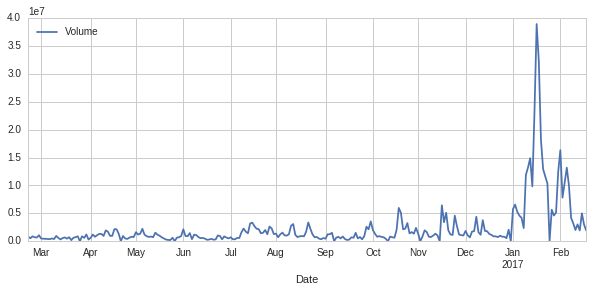

In [13]:
PDG_list['Volume'].plot(legend=True,figsize=(10,4))

## Calculando a Média Móvel para ações da PDG 

Mais sobre média móvel pode ser achado na Investopedia : http://www.investopedia.com/terms/m/movingaverage.asp

In [14]:
#Aqui 10, 20 e 50 dias são os que eu resolvi chamar no for loop
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA para %s dias" %(str(ma))
    
    PDG_list[column_name] = pd.rolling_mean(PDG_list['Adj Close'],ma)

/home/anderson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/home/anderson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/home/anderson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


In [15]:
PDG_list.head()

,Open,High,Low,Close,Volume,Adj Close,MA para 10 dias,MA para 20 dias,MA para 50 dias
Date,,,,,,,,,
2016-02-22,5.92,6.16,5.74,5.97,824000,5.97,NaN,NaN,NaN
2016-02-23,6.01,6.11,5.64,5.82,532300,5.82,NaN,NaN,NaN
2016-02-24,5.78,6.77,5.59,6.77,862900,6.77,NaN,NaN,NaN
2016-02-25,6.73,7.35,6.70,7.15,713000,7.15,NaN,NaN,NaN
2016-02-26,7.21,7.69,7.03,7.25,655100,7.25,NaN,NaN,NaN


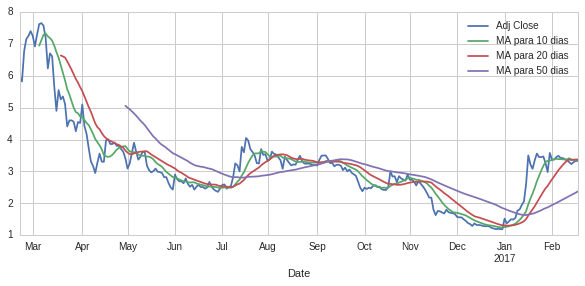

In [16]:
PDG_list[['Adj Close', 'MA para 10 dias', 'MA para 20 dias', 'MA para 50 dias']].plot(subplots=False,figsize=(10,4))

### Obviamente vemos no gráfico acima que as curvas têm menor flutuação a medida que aumenta o intervalo de tempo. Usando o mesmo link acima da Investopedia eu posso usar essas curvas para também obter o "Crossover" e "Support" e assim fazer um modelo para predizer o comportamento futuro de tais cotações e por conseguinte melhor entendê-las

## Agora vou calcular o Retorno Diário das ações da PDG
### Aqui usei a porcentagem, portanto, refere-se ao percentual de ganho ou perda que você teve na ação naquele dia . Obs: aqui podemos ver claramente os altíssimos ganhos pra quem entrou na onda da especulação da PDG nas últimas semanas

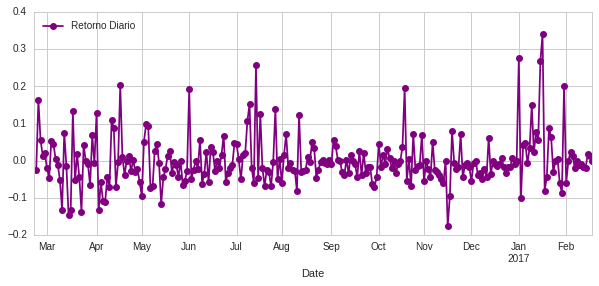

In [17]:
PDG_list['Retorno Diario'] = PDG_list['Adj Close'].pct_change()
PDG_list['Retorno Diario'].plot(figsize=(10,4), legend=True,linestyle='-', marker='o', color ='purple')


### Aqui eu uso o Seaborn para calcular plotar a distribuição do Retorno Diário 

/home/anderson/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


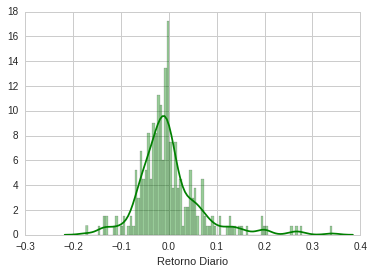

In [18]:
sns.distplot(PDG_list['Retorno Diario'].dropna(), bins=100, color = 'green')

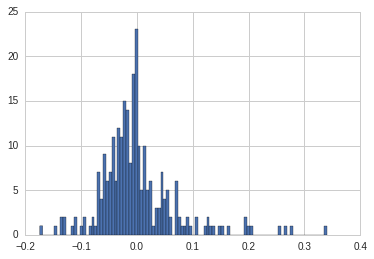

In [19]:
PDG_list['Retorno Diario'].hist(bins=100)

## Agora, analisando Cyrela, EzTec, PDG e Rossi
### Criando agora um novo dataframe, usando Pandas, e novamente usando Yahoo Finance. E partir daqui calcular o retorno diário para as mesmas.

In [20]:
closing_df = web.DataReader(Brazil_list, 'yahoo', start,end)['Adj Close']

In [21]:
closing_df.head()

,CYRE3.SA,EZTC3.SA,PDGR3.SA,RSID3.SA
Date,,,,
2016-02-22,8.007,11.82686,5.97,4.05
2016-02-23,7.822,11.42523,5.82,4.07
2016-02-24,7.793,11.05923,6.77,4.00
2016-02-25,7.774,11.54132,7.15,4.38
2016-02-26,7.939,11.71086,7.25,4.20


In [22]:
constr_rets = closing_df.pct_change()

In [23]:
constr_rets.head()

,CYRE3.SA,EZTC3.SA,PDGR3.SA,RSID3.SA
Date,,,,
2016-02-22,NaN,NaN,NaN,NaN
2016-02-23,-0.023105,-0.033959,-0.025126,0.004938
2016-02-24,-0.003707,-0.032034,0.163230,-0.017199
2016-02-25,-0.002438,0.043592,0.056130,0.095000
2016-02-26,0.021225,0.014690,0.013986,-0.041096


### Abaixo , um gráfico de correlação. Fazendo o primeiro teste, eu vejo que , como esperado, as ações tem prefeita correlação , demonstrada pelo Pearson Number = 1, porque obviamente, estou comparando PDG com PDG

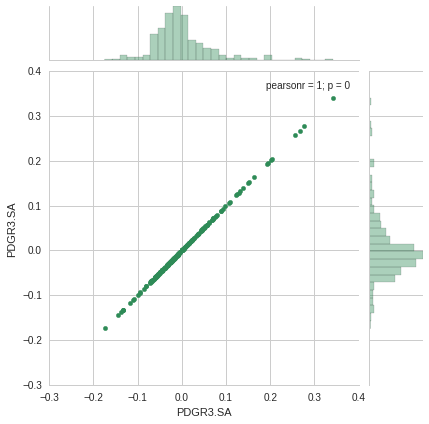

In [24]:
sns.jointplot('PDGR3.SA', 'PDGR3.SA', constr_rets,kind = 'scatter', color='seagreen')

### Agora comparando PDG com EzTec, vemos um Pearson Number de 0.17.

Vale lembrar que o Coeficiente de Person uma medida da dependência linear (correlação) entre duas variáveis X e Y.

E mais pode ser compreendido no link : https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

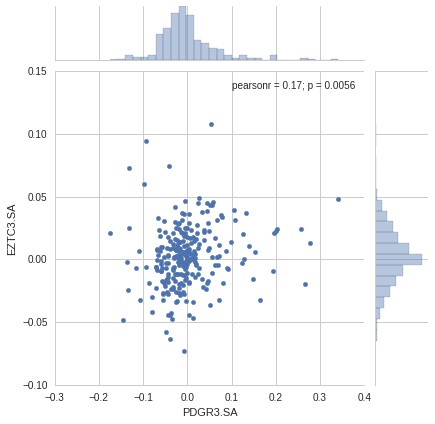

In [25]:
sns.jointplot('PDGR3.SA', 'EZTC3.SA', constr_rets,kind = 'scatter')

In [26]:
constr_rets.head()

,CYRE3.SA,EZTC3.SA,PDGR3.SA,RSID3.SA
Date,,,,
2016-02-22,NaN,NaN,NaN,NaN
2016-02-23,-0.023105,-0.033959,-0.025126,0.004938
2016-02-24,-0.003707,-0.032034,0.163230,-0.017199
2016-02-25,-0.002438,0.043592,0.056130,0.095000
2016-02-26,0.021225,0.014690,0.013986,-0.041096


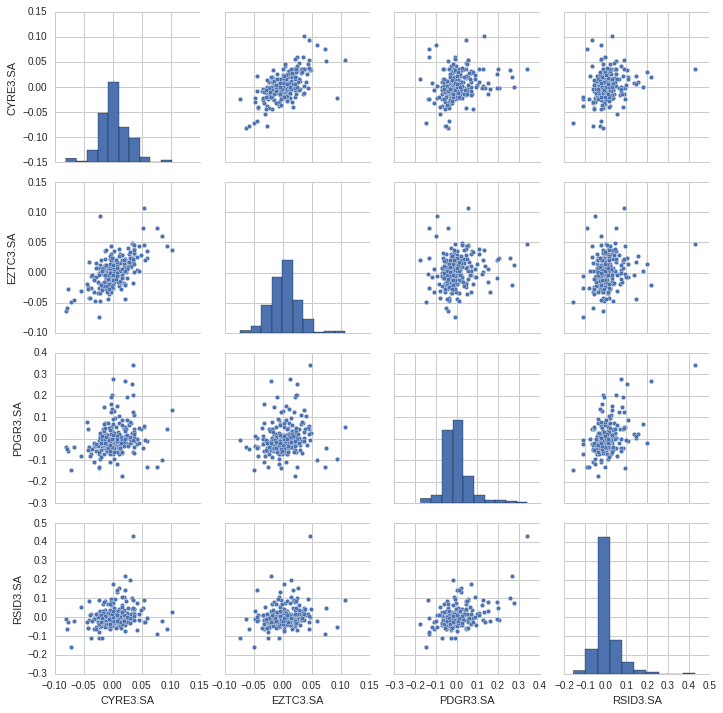

In [27]:
sns.pairplot(constr_rets.dropna())

### Vendo os plots de correlação abaixo, percebemos que o retorno percentual da Cyrela tem um correlação maior com o da Eztec. Talvez porque, comparação com PDG e Rossi, estejam em situação mais sólida ? Interessante que, pelo mesmo formato do KDE plot, histograma e Scatter plot, percebemos que a PDG tem maior correlação com a Rossi do que com Ezetc ou Cyrela.

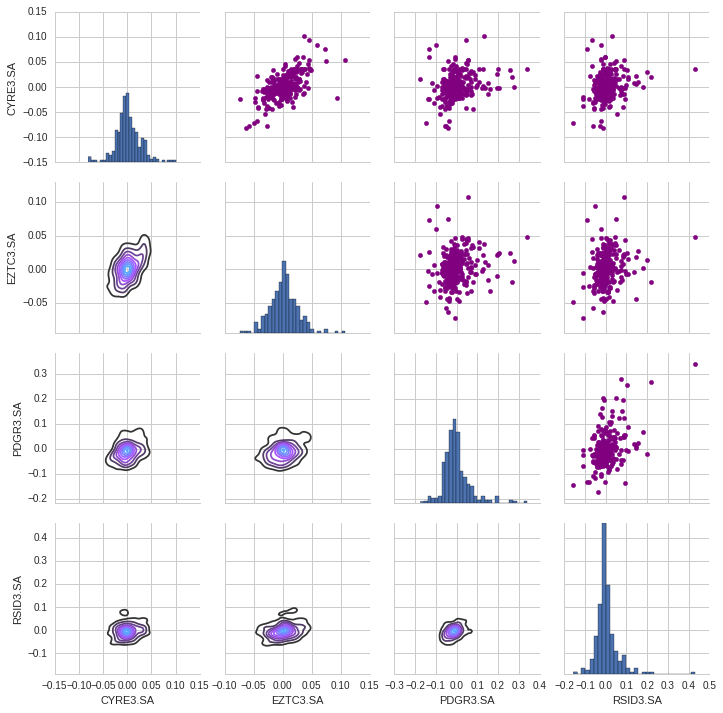

In [28]:
returns_fig = sns.PairGrid(constr_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


### Agora, analisando a correlação das cotações no fechamento do pregão, podemos ver No quadro abaixo percebemos uma considerável correlação entre o preço das ações da Cyrela e da EZTEC. (Basta olhar o segundo quadro na primeira linha ou o primeiro quadro na segunda linha). 

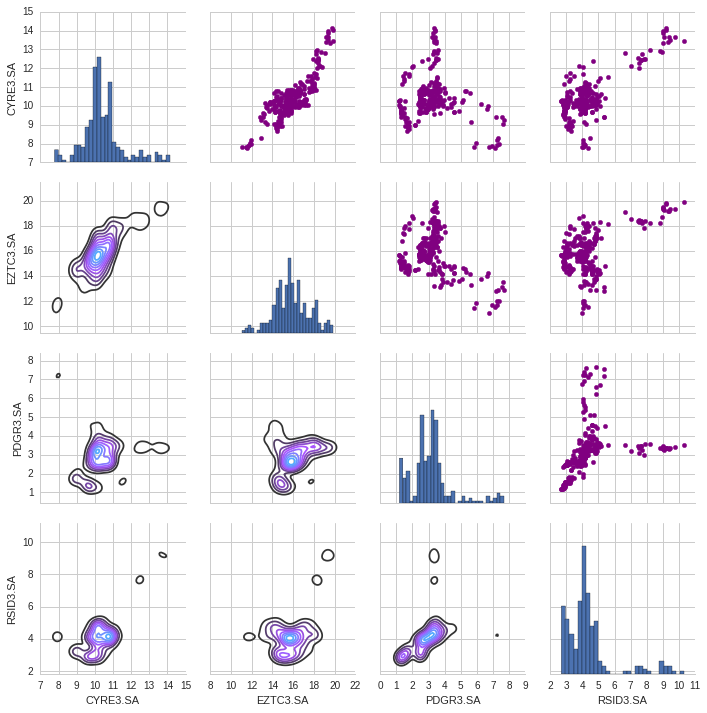

In [29]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


## Esteticamente, são interessantes os plots acima. Mas nada melhor do que construir uma matriz de correlação. O que fiz abaixo usando a modelagem linear do Seaborn

In [30]:
import seaborn.linearmodels as snl

/home/anderson/anaconda3/lib/python3.5/site-packages/seaborn/linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/home/anderson/anaconda3/lib/python3.5/site-packages/seaborn/linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


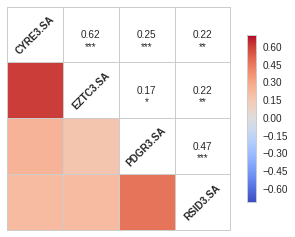

In [31]:
snl.corrplot(constr_rets.dropna(),annot=True)

### A informação acima só corrobora o que já tínhamos visto nos plots anteriores:


* Os retornos percentuais diários de Cyrela e Eztec são fortíssimos, tendo 62% de correlação.

* Já os retornos percentuais de PDG e ROSSI, tem 48% de correalação entre si.

## E agora, comparando o preço .É interessante ver que no plot abaixo as cotações da Rossi, nesse caso, tem maior similaridade com a Cyrela do que com a PDG (a mais próxima de uma recuperação judicial). 

/home/anderson/anaconda3/lib/python3.5/site-packages/seaborn/linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/home/anderson/anaconda3/lib/python3.5/site-packages/seaborn/linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


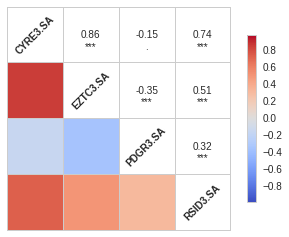

In [32]:
snl.corrplot(closing_df.dropna(),annot=True)

## Agora, fazendo uma básica Análise de Risco ,pra nos dizer : qual a melhor ação ??

In [33]:
rets = constr_rets.dropna()

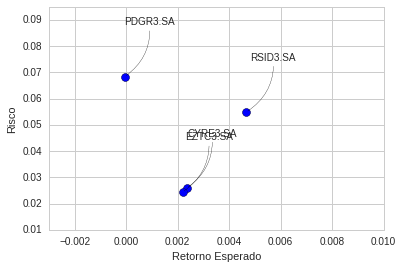

In [34]:
area = np.pi*20
plt.scatter(rets.mean(), rets.std(), s= area)
plt.xlabel('Retorno Esperado')


plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.095])
plt.xlim([-0.003,0.010])

#Set the plot axis titles
plt.xlabel('Retorno Esperado')
plt.ylabel('Risco')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


## Resposta : A escolha , como podemos ver, vai ficar entre Cyrela e Eztec:

* A Cyrela tem um maior retorno esperado, mas justamente a troco de um maior risco. 
* Assim, Eztec tem menor risco, mas também menor retorno. 
* Quem tem o maior retorno de todos é a Rossi, mas em troca de considerável aumento no Risco.
* A PDG está péssima em todos os sentidos. Maior risco e menor retorno.

## Agora, estudando os quantis para saber o retorno financeiro em números de cada ação

https://pt.wikipedia.org/wiki/Quantil

/home/anderson/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


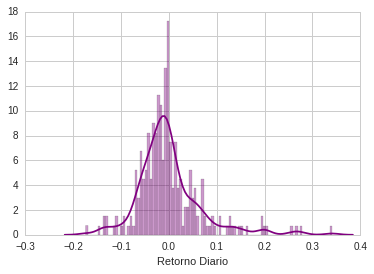

In [35]:
sns.distplot(PDG_list['Retorno Diario'].dropna(), bins=100,color='purple')

In [36]:
rets['EZTC3.SA'].quantile(0.05)

-0.03389463527412251

EZTEC : o quantil empírico nos diz que o retorno diário é está em -0.033. Isso significa que , com uma confidência de 95%, nossa pior perda diária não vai exceder 3.38%. Assim, 1 milhão de reais investidos na EZTEC 0.0338 * 1.000.000,00 = R$33.800,00.




### Agora calculando o mesmo para as outras 3 construtoras :

In [37]:
rets['PDGR3.SA'].quantile(0.05)

-0.08112627048805059

In [38]:
rets['RSID3.SA'].quantile(0.05)

-0.05900116144018584

In [39]:
rets['CYRE3.SA'].quantile(0.05)

-0.03703271631844568

### Vemos claramente que a PDG oferece o maior risco de perda.
 Com uma confidência de 95%, no pior dia de perda, a PDG poderá ter uma queda de 8.08% . Ou seja : no mesmo caso de  milhão de reais investidos, uma perda de R$80.861 ,00

In [40]:
days = 365

dt = 1/days

mu = rets.mean()['PDGR3.SA']

sigma = rets.std()['PDGR3.SA']


In [41]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt,scale= sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] + drift[x]+shock[x])
    return price
        
        

In [42]:
PDG_list.head()

,Open,High,Low,Close,Volume,Adj Close,MA para 10 dias,MA para 20 dias,MA para 50 dias,Retorno Diario
Date,,,,,,,,,,
2016-02-22,5.92,6.16,5.74,5.97,824000,5.97,NaN,NaN,NaN,NaN
2016-02-23,6.01,6.11,5.64,5.82,532300,5.82,NaN,NaN,NaN,-0.025126
2016-02-24,5.78,6.77,5.59,6.77,862900,6.77,NaN,NaN,NaN,0.163230
2016-02-25,6.73,7.35,6.70,7.15,713000,7.15,NaN,NaN,NaN,0.056130
2016-02-26,7.21,7.69,7.03,7.25,655100,7.25,NaN,NaN,NaN,0.013986


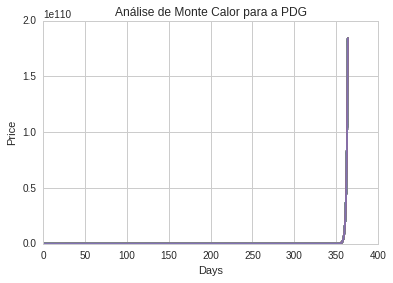

In [43]:
# Get start price from PDG.head()
start_price = 4.90
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Análise de Monte Calor para a PDG')